<a href="https://colab.research.google.com/github/vageeshmaiya/Attention-based-Synthetic-Battery-Data-Augmentation-Technique/blob/main/Attention_based_Synthetic_Battery_Data_Augmentation_Technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Attention-based-Synthetic-Battery-Data-Augmentation-Technique**

### **Mounting Drive**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Changing Directory path**

###### **Steps To Follow**

1. Once the drive has been mounted go to the files icon visible on the left hand side.

2. Click on the drive folder.

3. There find the folder containing the main_informer.py file.

4. Right click on the folder and click on the folder and select the copy path option.

5. Make sure to copy and paste the path of the folder containing the main_informer.py file in the code below. 

6. The path of the folder in the code below is ``/content/drive/MyDrive/Informer_model/informer``

In [2]:
%cd /content/drive/MyDrive/Informer_model/informer
!ls

/content/drive/MyDrive/Informer_model/informer
checkpoints  exp      main_informer.py	requirements.txt  utils
data	     LICENSE  models		results


### **Running the main code**

In [5]:
!python -u main_informer.py --model informer --data Battery --train_epochs 4 --attn prob --freq s --features S 

Args in experiment:
Namespace(activation='gelu', attn='prob', batch_size=32, c_out=1, checkpoints='./checkpoints/', cols=None, d_ff=2048, d_layers=1, d_model=512, data='Battery', data_path='dataset4.csv', dec_in=1, des='test', detail_freq='s', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', enc_in=1, factor=5, features='S', freq='s', gpu=0, inverse=True, itr=2, label_len=48, learning_rate=0.0001, loss='mse', lradj='type1', mix=True, model='informer', n_heads=8, num_workers=0, output_attention=False, padding=0, patience=3, pred_len=24, root_path='/content/drive/MyDrive/Informer_2021/Inf.zip (Unzipped Files)/Inf/ETDataset-main/ETT-small', s_layers=[3, 2, 1], seq_len=96, target='Voltage', train_epochs=4, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
>>>>>>>start training : informer_Battery_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 2771
val 391
test 802
E

### **Plotting Results**

##### **Changing Directory path**

1. Once the code is run a results folder will be created in the same folder which contains `main_informer.py` file under the folder name `results`.

2. The `results` folder contains 2 folders for two test runs each.

3. Copy the path for either one of the folders and paste it in the code below.

4. The path of the used in the code below is ``/content/drive/MyDrive/Informer_model/informer/results/informer_Battery_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1``


In [6]:
%cd /content/drive/MyDrive/Informer_model/informer/results/informer_Battery_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1
!ls

/content/drive/MyDrive/Informer_model/informer/results/informer_Battery_ftS_sl96_ll48_pl24_dm512_nh8_el2_dl1_df2048_atprob_fc5_ebtimeF_dtTrue_mxTrue_test_1
metrics.npy  pred.npy  true.npy


In [7]:
# Importing Requirements for plotting
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


preds = np.load('pred.npy') # Predicted parameters
trues = np.load('true.npy') # Ground truth parameters

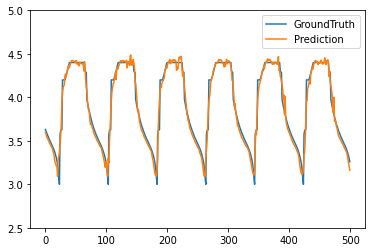

In [25]:
plt.figure()
# The below range plots the first 500 data points to get the whole plot use trues[:,1,-1] and preds[:,1,-1]
plt.plot(trues[:500,1,-1], label='GroundTruth') 
plt.plot(preds[:500,1,-1], label='Prediction')
plt.yticks([2.5,3,3.5,4,4.5,5]) # Y-axis markings (can be varied depending on the requirement)
plt.legend()
plt.show()